In [1]:
from starDust2 import classify

import pickle
import os 

__current_dir = os.path.curdir

clashlc = pickle.load(open(__current_dir+'/../../kfo_hstlc/clashlc.pkl','rb'))
caligula = clashlc[2]
caligula.meta
print(caligula.colnames)

['time', 'band', 'flux', 'fluxerr', 'mag', 'magerr', 'zpsys', 'zp']


In [ ]:
classify_cal = classify.classify(caligula,zhost=1.68,zhosterr=0.15,zminmax=[1.53,1.83],maxiter=1000,verbose=False)

/Users/kyleoconnor/anaconda2/envs/sd2/lib/python3.7/site-packages/sncosmo/fitting.py:158: RuntimeWarning: Dropping following bands from data: f350lp(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)
/Users/kyleoconnor/anaconda2/envs/sd2/lib/python3.7/site-packages/sncosmo/fitting.py:158: RuntimeWarning: Dropping following bands from data: f350lp(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)
/Users/kyleoconnor/anaconda2/envs/sd2/lib/python3.7/site-packages/sncosmo/fitting.py:158: RuntimeWarning: Dropping following bands from data: f350lp(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)
/Users/kyleoconnor/anaconda2/envs/sd2/lib/python3.7/site-packages/sncosmo/fitting.py:158: RuntimeWarning: Dropping following bands from data: f350lp(out of model wavelength range)
  "(out of model wavelength range)", RuntimeWarning)
/Users/kyleoconnor/anaconda2/envs/sd2/lib/python3.7/site-packages/sn

{'z': <function get_evidence.<locals>.zprior at 0x12288fbf8>, 'rv': <function get_evidence.<locals>.rvprior at 0x12288ff28>}
Had to remove object priorfn from return dictionary, as it was not pickleable.
{'z': <function get_evidence.<locals>.zprior at 0x12288fbf8>, 'rv': <function get_evidence.<locals>.rvprior at 0x12288ff28>}
Had to remove object priorfn from return dictionary, as it was not pickleable.
{'z': <function get_evidence.<locals>.zprior at 0x12288fbf8>, 'rv': <function get_evidence.<locals>.rvprior at 0x12288ff28>}
Had to remove object priorfn from return dictionary, as it was not pickleable.
{'z': <function get_evidence.<locals>.zprior at 0x12288fbf8>, 'rv': <function get_evidence.<locals>.rvprior at 0x12288ff28>}
Had to remove object priorfn from return dictionary, as it was not pickleable.
{'z': <function get_evidence.<locals>.zprior at 0x12288fbf8>, 'rv': <function get_evidence.<locals>.rvprior at 0x12288ff28>}
Had to remove object priorfn from return dictionary, as it 

In [5]:
import starDust2
print(starDust2.__file__)
print(classify.__file__)

/Users/kyleoconnor/anaconda2/envs/sd2/lib/python3.7/site-packages/starDust2-1.0-py3.7.egg/starDust2/__init__.py


In [4]:
print(classify_cal['bestmodel'])
print('original probabilities:pIa ~ {:.2e}, pIb/c ~ {:.2e}, pII ~ {:.2e}'.format(classify_cal['pIa'],classify_cal['pIbc'],classify_cal['pII']))
print('log-likelihoods:{}'.format(classify_cal['logztype']))
for param in classify_cal['snana-2006ix']['res']['param_dict']:
    print(param,classify_cal['snana-2006ix']['res']['param_dict'][param], '+-', classify_cal['snana-2006ix']['res']['errors'][param])


snana-2006ez
original probabilities:pIa ~ 1.13e-01, pIb/c ~ 5.99e-04, pII ~ 8.87e-01
log-likelihoods:{'II': -20.967852737254137, 'Ibc': -28.268466627553856, 'Ia': -23.032003894403264}
z 1.7028451160114222 +- 0.08421283842236917
t0 55553.70962729754 +- 12.339085810498167
amplitude 6.528331744525058e-20 +- 4.279942223991119e-20
hostebv 0.12982495658773469 +- 0.14297840364738756
hostr_v 3.0153938006790337 +- 0.5768768210315381


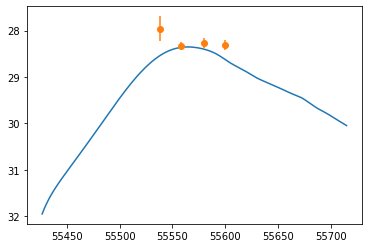

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import sncosmo
%matplotlib inline

data = classify_cal['snana-2006ez']['sn']

# need to use sncosmo normalize to take flux data from the zp 
# and shift it to corresponding flux for model zp ~ 25
d2 = sncosmo.photdata.photometric_data(data[data['band'] == 'F125W'])
d2 = d2.normalized(zp=25,zpsys= 'vega')

errs = data[data['band']=='F125W']['magerr']

param_dict = classify_cal['snana-2006ez']['res']['param_dict']
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='snana-2006ez',
                      effects=[dust],effect_names=['host'],effect_frames=['rest'])
model.set(**param_dict)


t0 = param_dict['t0']
time = np.linspace(model.mintime(),model.maxtime(),1000)
plt.plot(time,model.bandmag('F125W','vega',time))
#plt.plot(data[data['band']=='F125W']['time'],data[data['band']=='F125W']['flux2'],'o')
plt.errorbar(d2.time,-2.5*np.log10(d2.flux)+25,yerr= errs,fmt = 'o')

plt.gca().invert_yaxis()

In [3]:
!pip freeze>requirements.txt

In [4]:
!pip install --upgrade sncosmo

  Found existing installation: sncosmo 1.6.0
    Uninstalling sncosmo-1.6.0:
      Successfully uninstalled sncosmo-1.6.0


In [3]:
!pip install git+https://github.com/sncosmo/sncosmo.git


  Cloning https://github.com/sncosmo/sncosmo.git to /private/var/folders/xj/6c26g8zd2qj251qw1bvzf5hm0000gq/T/pip-req-build-pd5hrt0v
  Running command git clone -q https://github.com/sncosmo/sncosmo.git /private/var/folders/xj/6c26g8zd2qj251qw1bvzf5hm0000gq/T/pip-req-build-pd5hrt0v
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Stored in directory: /private/var/folders/xj/6c26g8zd2qj251qw1bvzf5hm0000gq/T/pip-ephem-wheel-cache-w0z3f5vx/wheels/ab/ad/f4/fe5bd6ff22fd6b23bfd138d5d49d3235bee4ee06ca0bf0799d
Successfully built sncosmo


In [ ]:
!pip uninstall sncosmo

Uninstalling sncosmo-2.0.0:
  Would remove:
    /Users/kyleoconnor/anaconda2/envs/sd2/lib/python3.7/site-packages/sncosmo-2.0.0.dist-info/*
    /Users/kyleoconnor/anaconda2/envs/sd2/lib/python3.7/site-packages/sncosmo/*
Proceed (y/n)? 